In [21]:
import numpy as np
import pandas as pd
import geopandas as gpd
import gstools as gs
import matplotlib.pyplot as plt
from shapely.geometry import Point


df = pd.read_csv(r'G:\fresh_start\paper\code_paper\main_data\raw_data\1962_lapse_station_data.csv')
basin_boundary = gpd.read_file(r'G:\fresh_start\paper\code_paper\temp_file\stations.shp')



df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Group by 'year', 'station', 'lat', 'long', 'elevation' and calculate mean for Tmin and Tmax
annual_mean_df = df.groupby(['year', 'station', 'lat', 'long', 'elevation']).agg({
    'Tmin': 'mean',
    'Tmax': 'mean'
}).reset_index()
# Round the temperature columns to 2 decimal points and convert to float32
annual_mean_df['Tmin'] = annual_mean_df['Tmin'].round(2).astype(np.float32)
annual_mean_df['Tmax'] = annual_mean_df['Tmax'].round(2).astype(np.float32)

year_to_analyze = 2020  




# Assuming annual_mean_df is already prepared and filtered for a specific year
selected_year_df = annual_mean_df[annual_mean_df['year'] == year_to_analyze]


In [22]:
lons=np.array(selected_year_df['long']) 
lats=np.array(selected_year_df['lat']) 
zdata=np.array(selected_year_df['Tmax'])
boundary = basin_boundary
xmin, ymin, xmax, ymax = boundary.total_bounds
xmin = xmin-0.01
xmax = xmax+0.01

ymin = ymin-0.01
ymax = ymax+0.01

grid_lon = np.linspace(xmin, xmax, 100)
grid_lat = np.linspace(ymin, ymax, 100)

In [25]:
OK = OrdinaryKriging(lons, lats, zdata, variogram_model='spherical', verbose=True, enable_plotting=False,nlags=6)
z1, ss1 = OK.execute('grid', grid_lon, grid_lat)
print (z1)

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'spherical' Variogram Model
Partial Sill: 59.91990747593052
Full Sill: 59.919946243180455
Range: 1.0176752719308346
Nugget: 3.8767249931695155e-05 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...

[[21.00643288519505 21.082251696369152 21.159683212873674 ...
  24.45123573597223 24.32316154857079 24.201705722782158]
 [21.068138782448873 21.149342524191066 21.23193503976386 ...
  24.51990250252859 24.39352361386908 24.273146259616908]
 [21.135896242154814 21.222537870734847 21.31034600352205 ...
  24.585347851114552 24.46104886755096 24.342062817709568]
 ...
 [16.397875075079305 16.267449338263546 16.336032940460214 ...
  15.062963517350358 14.957025803263312 14.847173294025247]
 [16.14815500155562 15.958211810999869 15.94022451212575 ...
  15.120322194179941 15.011520828659624 14.900814215346834]
 [15.965817989738635 15.789722425918136 15.812182480407733

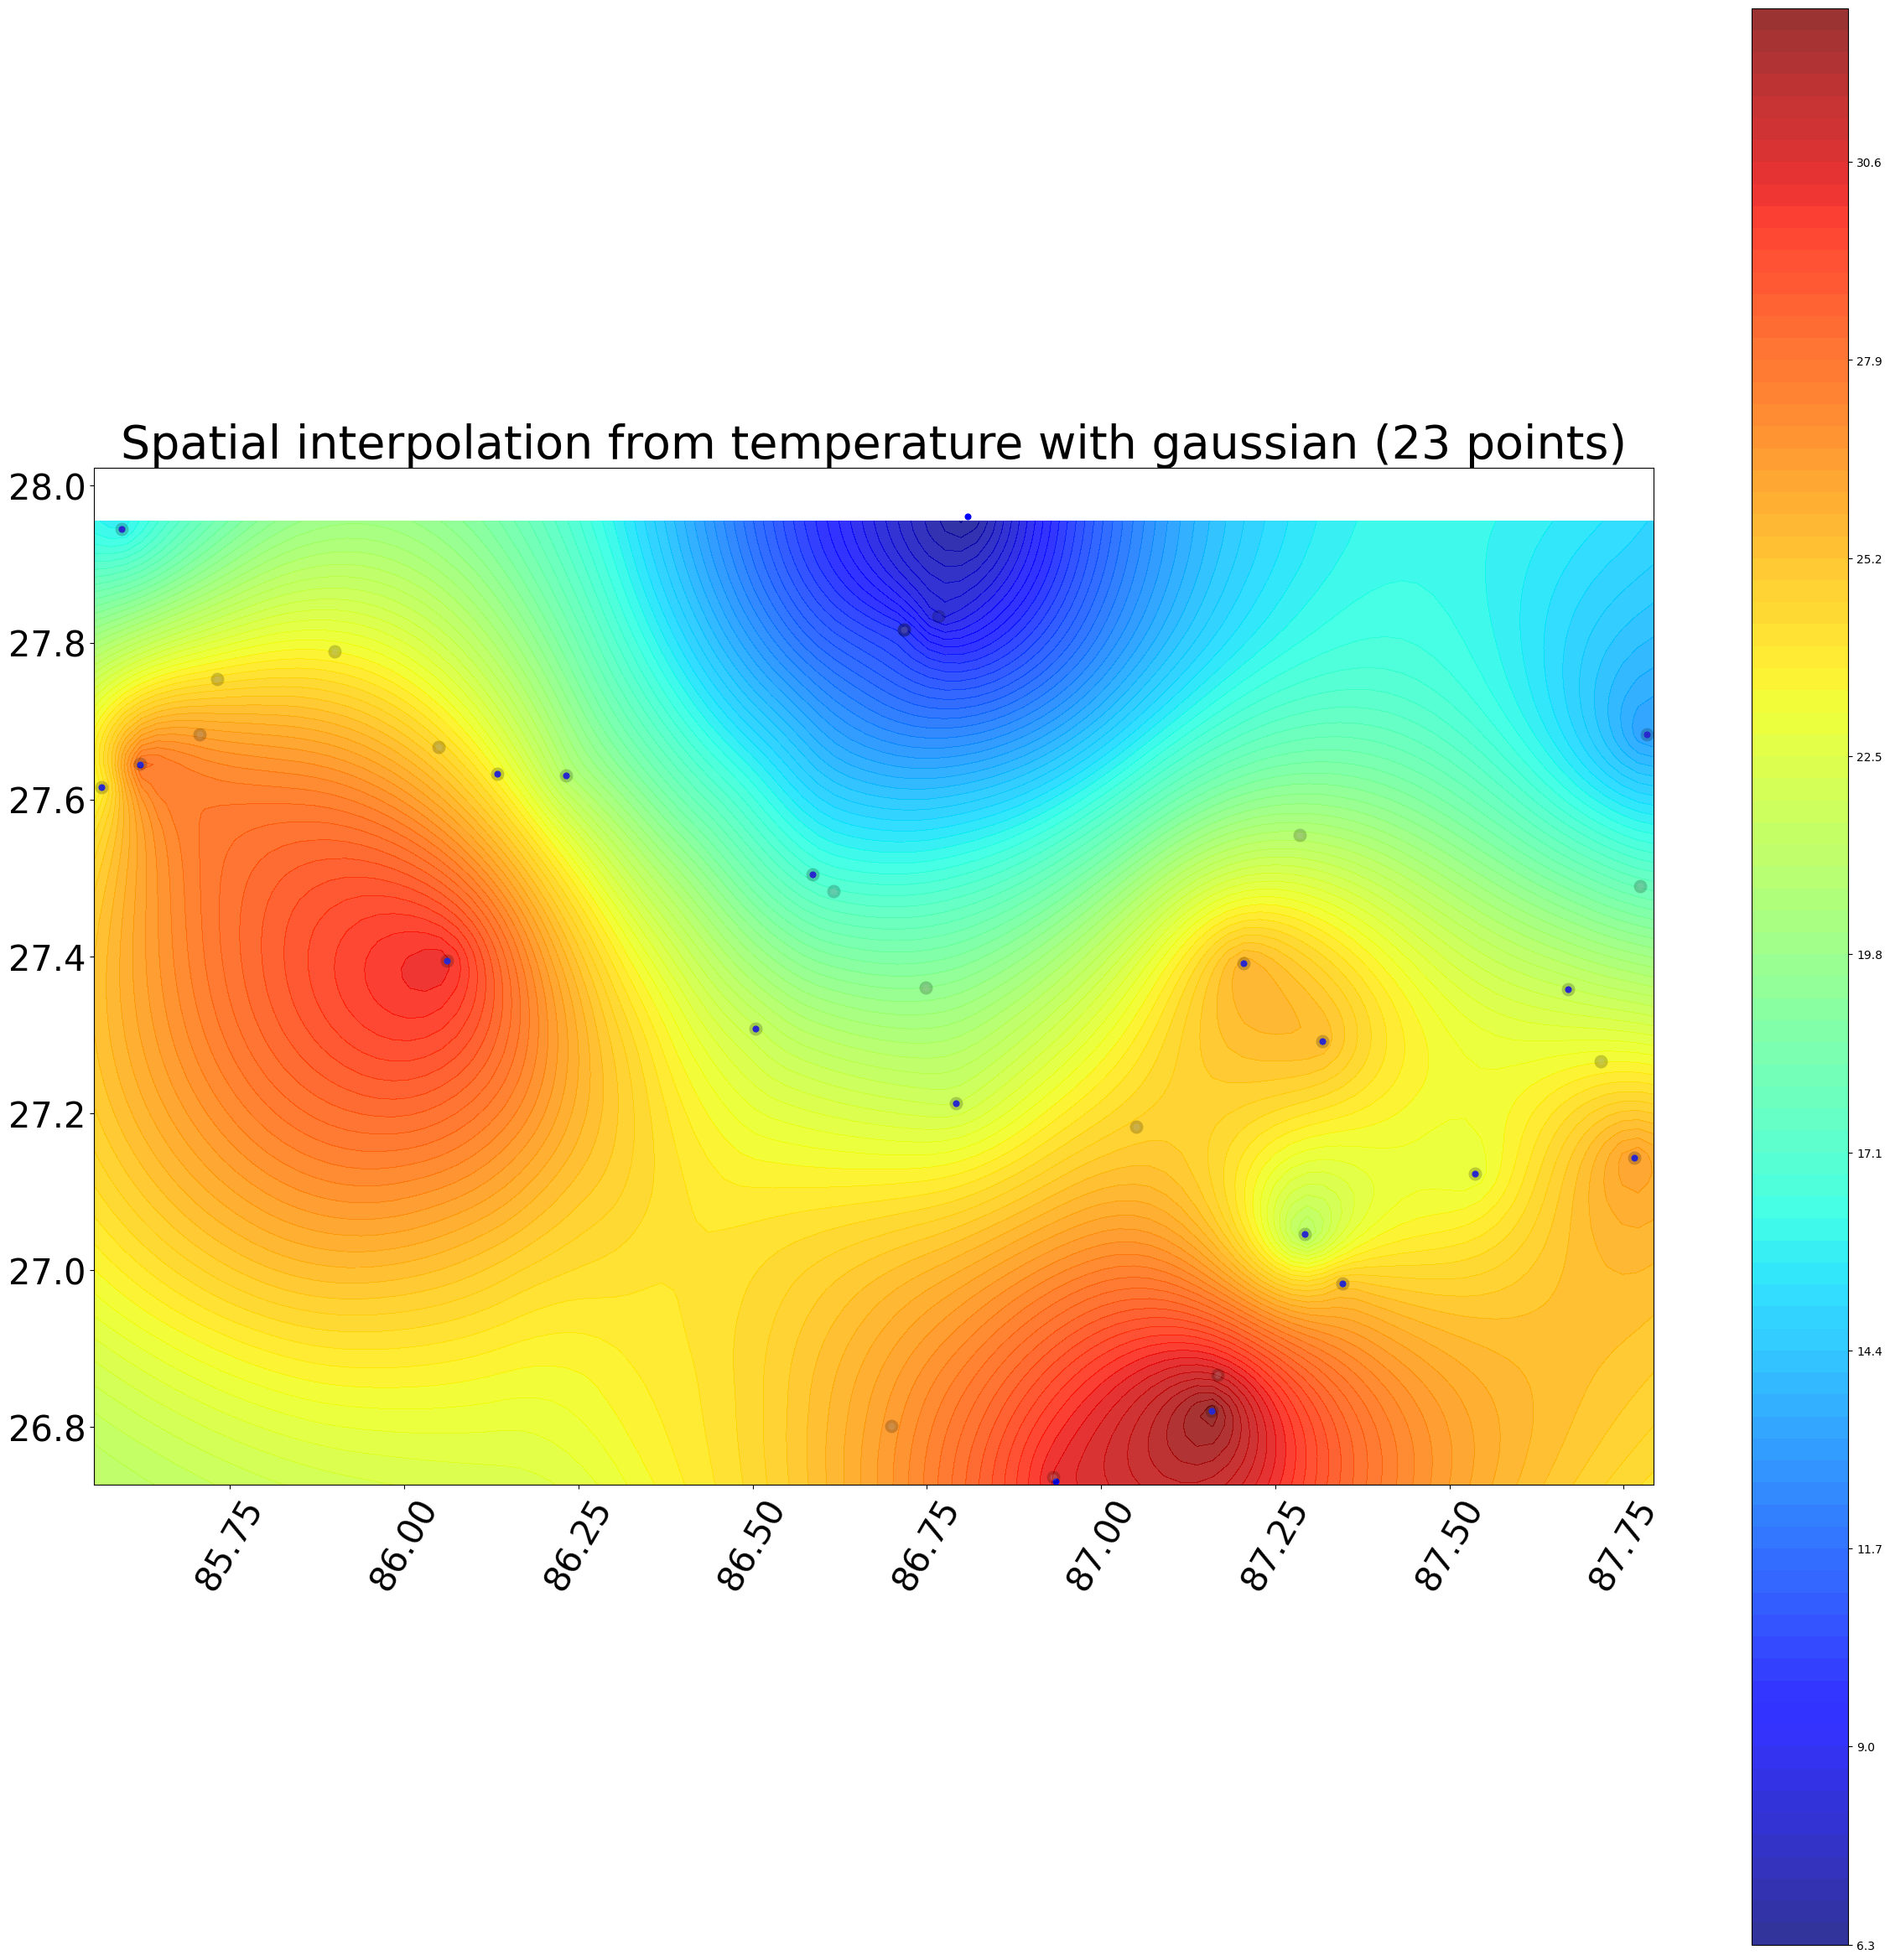

In [26]:
xintrp, yintrp = np.meshgrid(grid_lon, grid_lat) 
fig, ax = plt.subplots(figsize=(30,30))


#ax.scatter(lons, lats, s=len(lons), label='Input data')
boundarygeom = boundary.geometry

contour = plt.contourf(xintrp, yintrp, z1,len(z1),cmap=plt.cm.jet,alpha = 0.8) 


plt.colorbar(contour)


boundary.plot(ax=ax, color='white', alpha = 0.2, linewidth=5.5, edgecolor='black', zorder = 5)


npts = len(lons)

plt.scatter(lons, lats,marker='o',c='b',s=npts)

#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)

plt.xticks(fontsize = 30, rotation=60)
plt.yticks(fontsize = 30)

#Tempreture
plt.title('Spatial interpolation from temperature with gaussian (%d points)' % npts,fontsize = 40)
plt.show()
#ax.plot(grid_lon, grid_lat, label='Predicted values')